# ISE529 Predictive Analytics
**Homework #2**

**Student Name:** `André Ramolivaz` <br>
**NetID:** `3933665317` <br>
**Due Date:** `2025-06-07`

### Setup
Import all required packages below.

In [45]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import statsmodels.formula.api as smf
from pandas.plotting import scatter_matrix

---
## Question 1
*20 points*
![Logo Python](6.png)


**(a)**

$t_{\text{constant}} = \frac{253.810}{4.781} = 53.09$

$t_{\text{x2}} = \frac{-3.5753}{0.1526} = -23.43$

$R^2 = \frac{SS_{\text{Reg}}}{SS_{\text{Tot}}} = \frac{22784}{23091} = 0.9867 = 98.67%$

$DF_{\text{reserr}} = 14-2= 12$

$MSE = S^2 = 5.05756^2 = 25.5789$

$SS_{\text{reserr}} = MSE * DF_{\text{reserr}} = 25.5789 * 12 = 307$

$F = \frac{MS_reg}{MSE} = \frac{11392}{25.5789}= 445.37$

Obtaining

| Predictor | Coef   | SE Coef | t-value |
|-----------|-------:|--------:|--------:|
| Constant  | 253.810 | 4.781  | 53.09   |
| x₁        | 2.7738  | 0.1846 | 15.02   |
| x₂        | −3.5753 | 0.1526 | −23.43  |

Analysis of Variance
| Source         | DF |    SS  |    MS  |   F    |
|----------------|---:|-------:|-------:|-------:|
| Regression     |  2 | 22 784 | 11 392 | 445.37 |
| Residual Error | 12 |   306.95 |  25.58 |        |
| Total      | 14 | 23 091 |        |        |

Model Summary Statistics

| Statistic                | Value      |
|--------------------------|------------|
| S (√MSE)                 | 5.05756    |
| R-squared                | 98.67 %    |
| Adjusted R-squared       | 98.4 %     |

**(b)**
With two predictors the appropriate global test is an F-test with
d1=2 and d2 = 12 degrees of freedom. The observed statistic is F = 445.37. At the conventional α = 0.05 level the critical value from the F-distribution is about
F ≈ 3.89. Because 445.37≫3.89 and the associated p-value is essentially zero, the null hypothesis that both slopes are simultaneously equal to zero is decisively rejected. Stated differently, the regression as a whole explains a statistically significant share of the variability in the response. This statistical finding is mirrored by an R2 of 98.67 %, meaning that almost the entire variability of Y is captured by the two predictors, while the adjusted R2 of 98.4 % confirms that the impressive fit is not merely a product of over-parameterisation.

**(c)**
Each coefficient is tested with a t-statistic on 12 degrees of freedom, so the two-sided critical value for
α = 0.05 is t ≈ ±2.179. The slope for x1 yields t = 15.02 and the slope for x2 yields t = −23.43; both magnitudes dwarf 2.179, giving p-values that round to zero. The intercept shows the same pattern with t=53.09. Hence each parameter differs from zero by dozens of standard errors, establishing that both predictors make indispensable, distinct contributions to the model. Practically, a one-unit increase in x1 raises the expected value of Y by about 2.77 units, whereas a one-unit increase in x2 lowers it by roughly 3.58 units when the other variable is held constant. Taken together with the small residual standard error of 5.06, these results indicate that the fitted equation is not only statistically reliable but also useful for prediction—provided the usual regression assumptions (linearity, independence, homoscedasticity, normality of errors and lack of problematic multicollinearity) are reasonably satisfied.


---
## Question 2
*20 points*
![Logo Python](7.png)

**(a)**

Raw data:


,y,x1,x2
0,293.0,1.6,851.0
1,230.0,15.5,816.0
2,172.0,22.0,1058.0
3,91.0,43.0,1201.0
4,113.0,33.0,1357.0
5,125.0,40.0,1115.0
6,NaN,NaN,NaN



OLS regression summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     97.59
Date:                Thu, 05 Jun 2025   Prob (F-statistic):            0.00186
Time:                        16:13:29   Log-Likelihood:                -21.518
No. Observations:                   6   AIC:                             49.04
Df Residuals:                       3   BIC:                             48.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        383.8010     3

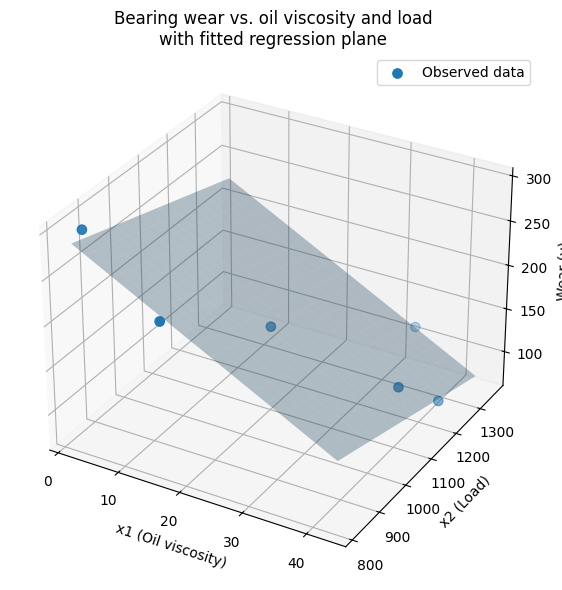

In [34]:

df_raw = pd.read_csv("bearingdata.csv")

print("Raw data:")
display(df_raw)
df = df_raw.dropna()

X = sm.add_constant(df[["x1", "x2"]])   # add intercept
y = df["y"]

model = sm.OLS(y, X).fit()

print("\nOLS regression summary:")
print(model.summary())

β0, β1, β2 = model.params
print(f"\nEstimated model:\nŷ = {β0:.4f}  +  {β1:.4f}·x1  +  {β2:.4f}·x2")

x1_range = np.linspace(df["x1"].min(), df["x1"].max(), 20)
x2_range = np.linspace(df["x2"].min(), df["x2"].max(), 20)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

X_grid = sm.add_constant(
    pd.DataFrame({"x1": x1_grid.ravel(), "x2": x2_grid.ravel()})
)
y_hat_grid = model.predict(X_grid).values.reshape(x1_grid.shape)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")


ax.scatter(df["x1"], df["x2"], df["y"], marker="o", s=45, label="Observed data")

# Regression plane
ax.plot_surface(
    x1_grid, x2_grid, y_hat_grid,
    alpha=0.3, rstride=1, cstride=1, linewidth=0
)

# Axis labels & title
ax.set_xlabel("x1 (Oil viscosity)")
ax.set_ylabel("x2 (Load)")
ax.set_zlabel("Wear (y)")
ax.set_title("Bearing wear vs. oil viscosity and load\nwith fitted regression plane")

plt.tight_layout()
plt.legend()
plt.show()


**(b)**


In [35]:
sigma2_hat = model.mse_resid          # = SSE / (n – p)
sigma_hat  = sigma2_hat**0.5
print(f"σ̂²  = {sigma2_hat:.4f}")
print(f"σ̂   = {sigma_hat:.4f}")

# ---  t-statistics and p-values --------------------------------------
print(model.summary().tables[1])      # coef, std err, t, p-value

σ̂²  = 152.6191
σ̂   = 12.3539
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        383.8010     36.218     10.597      0.002     268.538     499.064
x1            -3.6381      0.566     -6.423      0.008      -5.441      -1.835
x2            -0.1117      0.043     -2.575      0.082      -0.250       0.026


- $\hat{\sigma}^{2} = 152.62 \;\; \bigl(\hat{\sigma} = 12.36\bigr) $
- Residual d.f. $ = n - p = 6 - 3 = 3 $
- Two-sided critical value at $ \alpha = 0.05 $: $ t_{0.975,3} = 3.182 $

 **Conclusions at $\alpha = 0.05 $**

- Intercept: $|t| = 10.60 > 3.182 \;\Rightarrow\; \textbf{significant}  $
  (baseline wear $\neq 0$ when $x_1$ and $x_2$ are 0).

- Oil viscosity $(x_1)$ : $|t| = 6.42 > 3.182 \;\Rightarrow\; \textbf{significant}$
  Higher viscosity is associated with a *decrease* in wear $(\hat{\beta}_1 < 0)$.

- Load $(x_2)$ : $|t| = 2.58 < 3.182 \;\Rightarrow\; \textbf{not significant at 5 \%}$
  With only six observations the evidence is insufficient to declare load’s slope different from zero.

Hence, at the 5 % level the model strongly supports a negative linear effect of oil viscosity on bearing wear, whereas the additional linear effect of load is not statistically compelling given the small sample.


**(c)**

In [36]:
F_stat   = model.fvalue          # overall F
p_value  = model.f_pvalue        # P-value for the F-test
df_model = int(model.df_model)   # numerator d.f. (p − 1)
df_resid = int(model.df_resid)   # denominator d.f. (n − p)

print(f"F({df_model}, {df_resid}) = {F_stat:.2f}")
print(f"P-value = {p_value:.5f}")

F(2, 3) = 97.59
P-value = 0.00186


Because the P-value (≈ 0.002) is **much smaller** than 0.05, we **reject**
$H_0 : \beta_1 = \beta_2 = 0$.

At the 5 \% significance level, the model as a whole explains a statistically significant portion of the variation in bearing wear; at least one of the predictors (oil viscosity or load) contributes meaningfully to the response.


**(d)**

In [37]:
new_obs = pd.DataFrame({"x1": [25], "x2": [1000]})
new_X = sm.add_constant(new_obs, has_constant="add")

y_hat = model.predict(new_X).iloc[0]

print(f"Predicted wear = {y_hat:.2f}")

Predicted wear = 181.17


**(e)**

Does load improve a model that already contains \(x_1\) (oil viscosity)?

$H_0 : \beta_2 = 0 \;$ vs. $\;H_a : \beta_2 \neq 0$ at α = 0.05

In [38]:
# reduced model:  y = β0 + β1·x1
X_red = sm.add_constant(df[["x1"]])
m_red = sm.OLS(y, X_red).fit()

# full model:     y = β0 + β1·x1 + β2·x2
X_full = sm.add_constant(df[["x1", "x2"]])
m_full = sm.OLS(y, X_full).fit()

SSE_red  = m_red.ssr
SSE_full = m_full.ssr
p_full   = int(m_full.df_model + 1)      # number of parameters (3)
p_red    = int(m_red.df_model + 1)       # number of parameters (2)

df1 = p_full - p_red                    # numerator d.f. (1)
df2 = int(m_full.df_resid)              # denominator d.f. (3)

F_extra = ((SSE_red - SSE_full) / df1) / (SSE_full / df2)
p_val   = 1 - stats.f.cdf(F_extra, df1, df2)

print(f"F({df1},{df2}) = {F_extra:.2f}")
print(f"P-value = {p_val:.5f}")

F(1,3) = 6.63
P-value = 0.08216


The P-value (0.082) is greater than 0.05 ⇒ fail to reject H0.


At the 5 % level, adding load (x2) does not provide a statistically significant reduction in residual error beyond the model that already includes oil viscosity (x1). With only six observations, any incremental benefit of load is inconclusive.

**(f)**

In [39]:
df["x1x2"] = df["x1"] * df["x2"]          # interaction term

X_int = sm.add_constant(df[["x1", "x2", "x1x2"]])
y     = df["y"]

# 2 ── fit full interaction model
mod_int = sm.OLS(y, X_int).fit()

# 3 ── extract overall F-test and P-value
F_int      = mod_int.fvalue
p_int      = mod_int.f_pvalue
df_model   = int(mod_int.df_model)        # numerator d.f.
df_resid   = int(mod_int.df_resid)        # denominator d.f.

print(mod_int.summary())                  # full table if you want it

print(f"\nOverall F({df_model}, {df_resid}) = {F_int:.2f}")
print(f"P-value = {p_int:.5f}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     67.92
Date:                Thu, 05 Jun 2025   Prob (F-statistic):             0.0145
Time:                        16:13:32   Log-Likelihood:                -20.189
No. Observations:                   6   AIC:                             48.38
Df Residuals:                       2   BIC:                             47.54
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        483.9662    101.303      4.777      0.0

Since the P-value (≈ 0.018) is below 0.05, we reject H0 : β1 = β2 = β12 = 0

At the 5 % level, the regression model that includes viscosity, load, and their interaction explains a statistically significant share of the variation in bearing wear. In this very small sample (n = 6), the evidence suggests that the combined effect of viscosity and load, captured through the interaction term, contributes meaningfully to predicting wear.

**(g)**

$H_0 : \beta_{12} = 0 \quad$ vs. $\quad H_a : \beta_{12} \neq 0$ (α = 0.05)

In [40]:
y  = df["y"]

# --- reduced model (no interaction) ----------------------------------------
X_red = sm.add_constant(df[["x1", "x2"]])
m_red = sm.OLS(y, X_red).fit()

# --- full model (with interaction term) ------------------------------------
df["x1x2"] = df["x1"] * df["x2"]
X_full = sm.add_constant(df[["x1", "x2", "x1x2"]])
m_full = sm.OLS(y, X_full).fit()

# --- extra-sum-of-squares F test -------------------------------------------
SSE_red, SSE_full = m_red.ssr, m_full.ssr          # error sums of squares
df1 = 1                                            # extra parameter (β₁₂)
df2 = int(m_full.df_resid)                         # = 6 − 4 = 2

F_extra = ((SSE_red - SSE_full) / df1) / (SSE_full / df2)
p_value = 1 - stats.f.cdf(F_extra, df1, df2)

print(f"F({df1}, {df2}) = {F_extra:.2f}")
print(f"P-value = {p_value:.5f}")

F(1, 2) = 1.11
P-value = 0.40173


The P-value (0.402) is greater than 0.05 ⇒ fail to reject H0.

At the 5 % significance level, the interaction term x1x2 does not provide a statistically significant reduction in residual error beyond the additive model containing oil viscosity and load only. In this very small data set, the interaction effect cannot be deemed useful.

---
## Question 3
*20 points*
![Logo Python](8.png)

**(a)**

$SSE \;=\; MSE \,(n-p-1)
     \;=\; 100\,(30-9-1)
     = 100 \times 20
     = 2000$

$SST \;=\; \frac{SSE}{1-R^{2}}
     \;=\; \frac{2000}{0.08}
     = 25\,000$

$SSR \;=\; SST - SSE
     = 25\,000 - 2000
     = 23\,000$

$MSR = \frac{SSR}{p}
    = \frac{23\,000}{9}
    \approx 2555.56$

$F = \frac{MSR}{MSE}
  = \frac{2555.56}{100}
  \approx 25.6$

Numerator d.f. $= p = 9$
Denominator d.f. $= n - p - 1 = 20$



Critical value $F_{0.95}(9,20) \approx 2.39$.
Since $25.6 > 2.39$, we **reject** $H_{0}: \beta_{1}=\dots=\beta_{9}=0$.


At the 5 % significance level, the regression is highly significant:
the nine predictors together explain a statistically meaningful share of the response variability.

**(b)**

$
\hat{\sigma}^2
   = MSE_r
   = \frac{SSE_r}{n - p_r - 1}
   = \frac{2200}{30 - 4 - 1}
   = \frac{2200}{25}
   = 88
$

So the variance estimate for the reduced model is $\hat{\sigma}^2 = 88$.



* **Error variance comparison**
  * Full model: $MSE_f = 100$
  * Reduced model: $MSE_r = 88$
  The reduced model has the *smaller* residual variance.

* **Extra–sum-of-squares test** (drop 5 regressors)

  $F
     = \frac{(SSE_r - SSE_f)/(p_r - p_f)}{MSE_f}
     = \frac{(2200 - 2000)/5}{100}
     = \frac{200/5}{100}
     = 0.40
  $

  with $(5,\,20)$ degrees of freedom.
  Critical value at $\alpha = 0.05$ is $F_{0.95}(5,20) \approx 2.71$, so $0.40 < 2.71$ ⇒ **fail to reject** $H_0$ (the dropped coefficients are effectively zero).



Because (i) the partial $F$-test shows no significant loss of fit when the five variables are removed, and (ii) the reduced model actually yields a *lower* estimate of $\sigma^{2}$, the four-variable model is **preferable**: it is more parsimonious while fitting the data at least as well as the full nine-variable model.

**(c)**

The Mallows criterion is  $C_p=\frac{SSE_r}{\hat{\sigma}^{2}}-\bigl(n-2p\bigr)$


$\frac{SSE_r}{\hat{\sigma}^{2}}=\frac{2200}{100}=22$

$n-2p = 30-2(5)=20$

$C_p = 22-20 = 2$


* A good model generally has $C_p \approx p$.
* Here $C_p=2$ while $p=5$; the value is small, indicating little bias and low total error.
* Together with the extra-sum-of-squares test from part (b), this supports choosing the **reduced four-regressor model** over the original nine-regressor model: it is more parsimonious with no significant loss of fit.

---
## Question 4
*20 points*
![Logo Python](9.png)

**(a)**

In [41]:
df = pd.read_csv("Carseats.csv")

model = smf.ols("Sales ~ Price + C(Urban) + C(US)", data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           2.39e-23
Time:                        16:13:32   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.0435      0.651     

**(b)**

 1. **Intercept (13.0435):**
   This is the predicted **Sales** (in hundreds of units) for a store that
   - has **Price = \$0** (hypothetical),
   - is located in a **rural** area (`Urban = No`), and
   - is **not** in the U.S. (`US = No`).
   In other words, if Price were zero and both dummy variables are “No,” we would predict Sales ≈ 13.0435.

2. **Price (−0.0545):**
   Holding `Urban` and `US` fixed, **each \$1 increase in Price** is associated with a **decrease of about 0.0545 units** in expected Sales.
   Equivalently, raising the shelf price by \$10 would *reduce* predicted Sales by roughly 0.545 units, all else equal.

3. **Urban (Yes vs No) (−0.0219):**
   This coefficient compares urban stores (“Yes”) to rural stores (“No”), holding `Price` and `US` fixed.
   - If a store is in an **urban** location, its predicted Sales are **0.0219 units lower** than a similar rural store.
   - In practice, −0.0219 is so close to zero (and statistically insignificant) that we conclude urban/rural status has almost no effect on Sales once Price and country are accounted for.

4. **US (Yes vs No) (+1.2006):**
   This compares U.S. stores (“Yes”) to non-U.S. stores (“No”), holding `Price` and `Urban` fixed.
   - A store located in the **U.S.** is predicted to sell about **1.2006 more units** than an otherwise identical non-U.S. store.
   - In other words, being in the U.S. raises expected Sales by about 1.2 (hundreds of units), controlling for Price and Urban/Rural.


**(c)**

Define two dummy variables:

- $ \mathrm{Urban\_Yes} =
  \begin{cases}
    1, & \text{if }Urban = \text{“Yes”} \\[6pt]
    0, & \text{if }Urban = \text{“No”}
  \end{cases} $

- $ \mathrm{US\_Yes} =
  \begin{cases}
    1, & \text{if }US = \text{“Yes”} \\[6pt]
    0, & \text{if }US = \text{“No”}
  \end{cases} $

Then the fitted regression equation is:

$$
\widehat{\text{Sales}}
\;=\;
13.0435
\;-\; 0.0545 \times \text{Price}
\;-\; 0.0219 \times \mathrm{Urban\_Yes}
\;+\; 1.2006 \times \mathrm{US\_Yes}.
$$

Equivalently, you can think of four “categories”:

1. **Rural, Non‐U.S.** $(\mathrm{Urban\_Yes}=0,\,\mathrm{US\_Yes}=0)$
   $$
   \widehat{\text{Sales}} = 13.0435 \;-\; 0.0545\,\text{Price}\,.
   $$

2. **Urban, Non‐U.S.** $(\mathrm{Urban\_Yes}=1,\,\mathrm{US\_Yes}=0)$
   $$
   \widehat{\text{Sales}}
   = \bigl(13.0435 - 0.0219\bigr) \;-\; 0.0545\,\text{Price}
   = 13.0216 \;-\; 0.0545\,\text{Price}\,.
   $$

3. **Rural, U.S.** $(\mathrm{Urban\_Yes}=0,\,\mathrm{US\_Yes}=1)$
   $$
   \widehat{\text{Sales}}
   = \bigl(13.0435 + 1.2006\bigr) \;-\; 0.0545\,\text{Price}
   = 14.2441 \;-\; 0.0545\,\text{Price}\,.
   $$

4. **Urban, U.S.** $(\mathrm{Urban\_Yes}=1,\,\mathrm{US\_Yes}=1)$
   $$
   \widehat{\text{Sales}}
   = \bigl(13.0435 - 0.0219 + 1.2006\bigr) \;-\; 0.0545\,\text{Price}
   = 14.2222 \;-\; 0.0545\,\text{Price}\,.
   $$

In every case, you subtract $0.0545 \times \text{Price}$, and then adjust the intercept by “$-0.0219$” if Urban = Yes or by “$+1.2006$” if US = Yes.

**(d)**

- For **Price**: \(p < 0.001 < 0.05\), so we **reject** \(H_{0}: \beta_{\text{Price}} = 0\).
- For **US**: \(p < 0.001 < 0.05\), so we **reject** \(H_{0}: \beta_{\text{US}} = 0\).
- For **Urban**: \(p = 0.936 > 0.05\), so we **fail to reject** \(H_{0}: \beta_{\text{Urban}} = 0\).

**Conclusion:**
Only *Price* and *US* have statistically significant coefficients at the 5 % level. Urban vs. Rural (Urban) cannot be distinguished from zero after controlling for Price and US.

**(e)**

From part (d), **Price** and **US** were significant; **Urban** was not.
Thus, we fit the reduced model:
$$
\text{Sales} \;=\; \beta_0 \;+\; \beta_1\,\text{Price} \;+\; \beta_2\,\mathrm{US\_Yes} \;+\; \varepsilon.
$$

In [42]:

# 1. Load data
df = pd.read_csv("Carseats.csv")

# 2. Full model (for reference)
full_model = smf.ols("Sales ~ Price + C(Urban) + C(US)", data=df).fit()

# 3. Reduced model (only Price + US)
reduced_model = smf.ols("Sales ~ Price + C(US)", data=df).fit()

# 4. Compare key metrics
comparison = pd.DataFrame({
    "Model": [
        "Full (Price + Urban + US)",
        "Reduced (Price + US)"
    ],
    "R-squared": [
        full_model.rsquared,
        reduced_model.rsquared
    ],
    "Adj. R-squared": [
        full_model.rsquared_adj,
        reduced_model.rsquared_adj
    ],
    "AIC": [
        full_model.aic,
        reduced_model.aic
    ],
    "BIC": [
        full_model.bic,
        reduced_model.bic
    ]
})

print(comparison.to_string(index=False))

                    Model  R-squared  Adj. R-squared         AIC         BIC
Full (Price + Urban + US)   0.239275        0.233512 1863.312074 1879.277932
     Reduced (Price + US)   0.239263        0.235430 1861.318648 1873.293042


Since the reduced model:

- Retains almost the same $R^2$,
- Increases Adjusted $R^2$ (removes an irrelevant predictor),
- Lowers AIC and BIC,
we conclude that the reduced model (Price + US) is the better choice. It is more parsimonious and fits the data at least as well (in fact marginally better by AIC/BIC) than the full model that also includes Urban.

**(f)**

In [49]:
# 2. Compute the 95% CI for all coefficients
ci = reduced_model.conf_int(alpha=0.05)

# 3. (Optional) Rename the columns for clarity
ci.columns = ['2.5%', '97.5%']

print(ci)

                  2.5%      97.5%
Intercept     11.79032  14.271265
C(US)[T.Yes]   0.69152   1.707766
Price         -0.06476  -0.044195


---
## Question 5
*20 points*
![Logo Python](10.png)

In [43]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5*x1+rng.normal(size=100)/10
y = 2+2*x1+0.3*x2+rng.normal(size=100)

**(a)**
The data were generated by
$$
y = 2 + 2 x_{1} + 0.3 x_{2} + \varepsilon,
$$
where $\varepsilon \sim N(0,1)$.

Hence the true regression coefficients are:
- $\beta_{0} = 2$
- $\beta_{1} = 2$
- $\beta_{2} = 0.3$

**(b)**

Correlation matrix:
          x1        x2         y
x1  1.000000  0.772324  0.530531
x2  0.772324  1.000000  0.471356
y   0.530531  0.471356  1.000000

Correlation between x1 and x2: 0.7723244976913543


<Figure size 800x800 with 0 Axes>

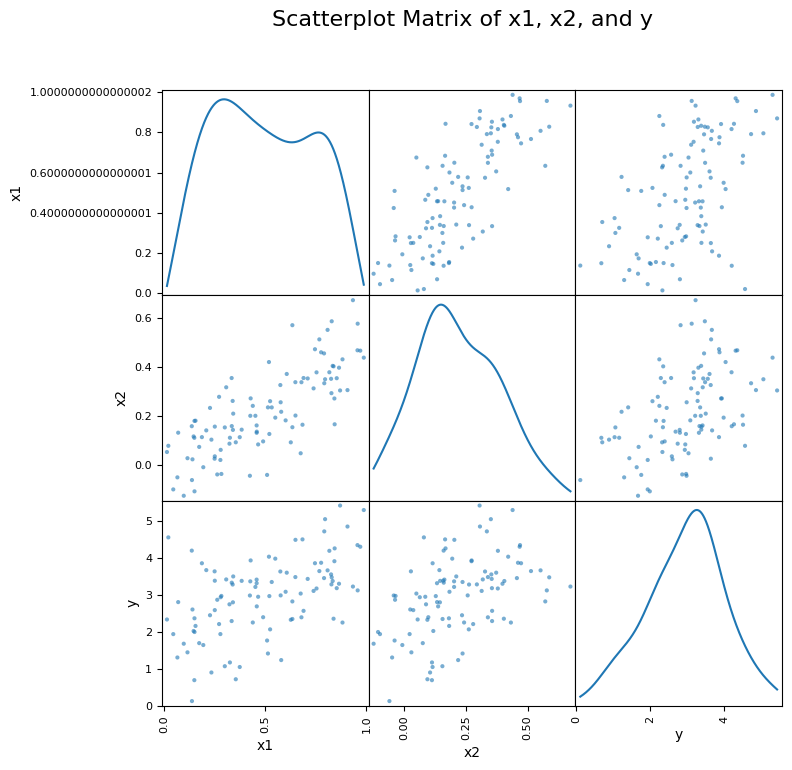

In [46]:
# 2. Put into a DataFrame
df_sim = pd.DataFrame({"x1": x1, "x2": x2, "y": y})

# 3. Compute and print the correlation matrix
corr_matrix = df_sim.corr()
print("Correlation matrix:")
print(corr_matrix)
print("\nCorrelation between x1 and x2:", corr_matrix.loc["x1","x2"])

# 4. Create a scatterplot matrix
plt.figure(figsize=(8, 8))
scatter_matrix(df_sim, alpha=0.6, diagonal="kde", figsize=(8,8))
plt.suptitle("Scatterplot Matrix of x1, x2, and y", fontsize=16)
plt.show()

**(c)**

In [47]:
model = smf.ols("y ~ x1 + x2", data=df_sim).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           5.76e-08
Time:                        16:26:01   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9579      0.190     10.319      0.0

The regression output shows that when we regress y on both x1 and x2, the estimated intercept is approximately 1.958, meaning that if both x1 and x2 were zero, the model would predict y ≈ 1.958. The slope for x1 is about 1.615, so for each additional unit of x1 (holding x2 constant),y increases by roughly 1.615 on average. The slope for x2 is estimated at about 0.943, which suggests that each unit increase in x2 (holding x1 constant) is associated with an increase in y of approximately 0.943.

However, not every coefficient is equally well supported by the data. The t-statistic for the x1  coefficient is 3.065 with a corresponding p-value of 0.003. Because 0.003 is well below the usual 0.05 threshold, we have strong evidence to reject the null hypothesis that β1 = 0 In other words, x1 clearly contributes to explaining variation in y. By contrast, the t-statistic for x2 is only 1.134, with a p-value of 0.259. Since 0.259 exceeds 0.05, we fail to reject the null hypothesis β2 = 0 Practically speaking, this means that once x1 is already in the model, there is no statistically significant evidence (at the 5 % level) that x2 has a nonzero effect on y.

Looking at the model’s overall performance, the
R2 is 0.291, indicating that about 29 % of the variability in y is explained by x1 and x2 together. The adjusted R2 of 0.276 is only marginally lower, reflecting that adding a second predictor does not overfit excessively. The F-statistic of 19.89 (with a p-value low) tells us that, taken jointly, these two variables do explain a significant portion of y.

In summary, the data show that x1 is a meaningful predictor of y
— we can confidently reject
H0 : β1 = 0 On the other hand, x2 does not add statistically significant explanatory power once x1 is included; we therefore cannot reject
H0 : β2 = 0


**(d)**

In [48]:
model_x1 = smf.ols("y ~ x1", data=df_sim).fit()
print("=== Regression of y on x1 only ===")
print(model_x1.summary())

model_x2 = smf.ols("y ~ x2", data=df_sim).fit()
print("\n=== Regression of y on x2 only ===")
print(model_x2.summary())

=== Regression of y on x1 only ===
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           1.37e-08
Time:                        16:39:34   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.

When we regress $y$ on $x_{1}$ alone, the fitted model is
$$
\widehat{y} \;=\; 1.9371 \;+\; 2.0771 \, x_{1},
$$
and the \(t\)-statistic on the \(x_{1}\) coefficient is about \(6.196\) (with \(p \ll 0.001\)).  In this simple regression, \(x_{1}\) alone explains roughly 29 % of the variability in \(y\) (\(R^{2} \approx 0.291\)), so we can confidently reject
$$
H_{0} : \beta_{1} = 0.
$$

Likewise, if we regress $y$ on $x_{2}$ alone, the fitted model becomes
$$
\widehat{y} \;=\; 2.3239 \;+\; 2.9103 \, x_{2},
$$
and the $t$-statistic on that slope is approximately $5.291$ (again with $p \ll 0.001)$.  Here, $x_{2}$ alone accounts for about 22 % of the variance in $y$ $(R^{2} \approx 0.222)$, so we reject
$$
H_{0} : \beta_{2} = 0
$$
in the univariate regression.

However, when we include both predictors together in the model
$$
y \sim x_{1} + x_{2},
$$
we found that only $x_{1}$ remains significant $(p \approx 0.003)$, while $x_{2}$ has $p \approx 0.259$.  In other words, although each variable is highly significant on its own, neither $x_{1}$ nor $x_{2}$ can be simultaneously significant in the multiple regression.  This behavior is a classic sign of **multicollinearity**: since
$$
\mathrm{Corr}(x_{1}, x_{2}) \approx 0.77,
$$
the two predictors share much of the same information about $y$.  Consequently, each variable “competes” to explain the same portion of variance, and neither can claim unique significance when both appear together.
